In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext watermark
%watermark --python --packages pandas,numpy,matplotlib

CPython 3.7.3
IPython 7.6.1

pandas 1.0.1
numpy 1.18.1
matplotlib 3.1.2


***

## Clipping/smothing
We saw that some predictions had a higher value than it was historically, also picks occurred over blending because of some overfitted solutions. So, let's try to smooth the picks.

Now, let's **attach the weights to the outstanding values** of Capture_Number. 

To define the 'outstanding values' we will use quantiles, the values of quantile was picked manually with validation on LB (risky way). Empirically, we've evaluated the quantile to be equal to about $0.75$. To pick weight will use the same validation strategy. Empirically, we've evaluated the weight to be in a range from $0.55$ to $0.8$.

In [2]:
a = pd.read_csv('submission_1.csv') # read the best submission from blendings
df_date = pd.read_csv('aux_train_data.csv') # read aux preprocesed data

In [3]:
# some preprocessing of files
df_aux = pd.concat([a.ID, a.ID.str.split('_', expand=True), a['Capture_Number']], axis=1)
df_aux['CaptureSite'] = df_aux[0] + '_' + df_aux[1]
# iterate over groups, count quantile, get indexes array and multiply predics[rows is in indexes] on weight
for group in df_aux.CaptureSite.unique():
    qunatile_high = df_date.groupby('CaptureSite')['Capture_Number'].quantile(0.75)[group]
    indx_to_max = df_aux[df_aux.CaptureSite == group][df_aux[df_aux.CaptureSite == group].Capture_Number >= qunatile_high].index
    
   # qunatile_low = df_date.groupby('CaptureSite')['Capture_Number'].quantile(0.5)[group]
   # indx_to_zero = df_aux[df_aux.CaptureSite == group][df_aux[df_aux.CaptureSite == group].Capture_Number <= qunatile_low].index
    
    #print(len(indx_to_max), end=', ')
    #print(len(indx_to_zero), end=', ')
    
    df_aux.loc[indx_to_max, 'Capture_Number'] = 0.7 * df_aux.loc[indx_to_max, 'Capture_Number']
    #df_aux.loc[indx_to_zero, 'Capture_Number'] = 2.5 * df_aux.loc[indx_to_zero, 'Capture_Number']

#df_aux[['ID', 'Capture_Number']].to_csv('one_more_try_to_reproduce_1.csv', index=False)

Let's evaluate the new distribution in comparison with the old one.

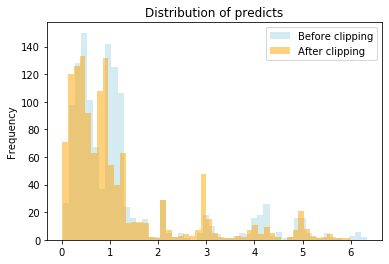

In [4]:
plt.title('Distribution of predicts')
a['Capture_Number'].plot.hist(bins=50, color='lightblue', alpha=0.5, label='Before clipping');
df_aux['Capture_Number'].plot.hist(bins=50, color='orange', alpha=0.5, label='After clipping');
plt.legend()